






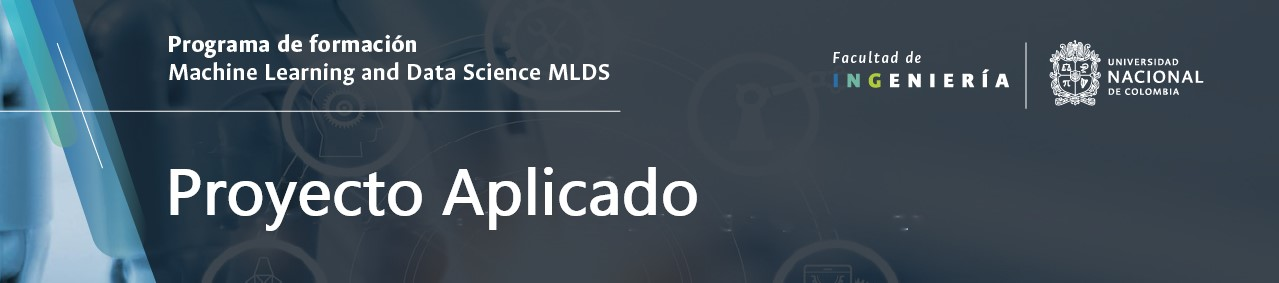

**Importar *librerías* a utilizar**

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [ ]:
!python --version
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('Matplotlib', mpl.__version__)
print('missingno', msno.__version__)

Python 3.10.11
Pandas 1.5.3
NumPy 1.22.4
Matplotlib 3.7.1
missingno 0.5.2


Este material fue realizado con las siguientes versiones:

- Python: 3.10.11
- pandas: 1.5.3
- NumPy: 1.22.4
- Matplotlib: 3.7.1
- Missingno: 0.5.2

# **Entendimiento y Preparación de los Datos**
---


## **1. Análisis Exploratorio de los Datos**
---

| Variable | Definición	| Valores |
| --- | --- | --- |
| Soc. | 	Sociedad  |'BP01','BP20,'BP30','BP40',BP50','BPCL' 	 |
| Centro 	| Centro de Distribución |No aplica |
| Material 	| Código de sku 	|Númerico |
| Desc. Mat. |	Descripción de Sku 	|No aplica |
| Grup. Arti |	Grupo de artículos 	|No aplica |
| Desc.Grup.Art |	Descripción grupo de artículos 	|No aplica |
| Cl.Aprovis |	Clase de aprovisionamiento 	|No aplica |
| De.Cl.Prod |	Descripción clase de producto	|No aplica |
| O.C / Pron |	Clasificación MTS - MTO |No aplica |
| Planificad 	| Planeador |No aplica |
| Desc.Gr.Co. |	Descripción grupo de compras	| No aplica |
| Lider Prod |	Ingeniero Líder de producto |	No aplica |
| Nombre R.C |	Responsable Comercial	| No aplica |
| Nomb R.CX |	Responsable Comercio Exterior |	No aplica |
| Durac.Cons |	Vida útil |	Númerico |
| Plazo Dias |	Tiempo de entrega	| Númerico |
| TpoReaprov |	Tiempo de fabricación |	Númerico |
| Cl.Apr.Esp |	Clase de aprovisionamiento especial |	'E','F','X' |
| Punto Pedi |	Punto de pedido	| Númerico |
| Stock Seg. |	Stock de seguridad |	Númerico |
| TamLoteMin |	Tamaño de lote mínimo |	Númerico |
| Vr Redond. |	Valor de redondeo	| Númerico |
| Jer Pro N1 |	Jerarquía de producto # 1 |	No aplica |
| Descri. J1 |	Descripción jerarquía de producto # 1 |	No aplica |
| Jer Pro N2 |	Jerarquía de producto # 2 |	No aplica |
| Descri. J2 |	Descripción jerarquía de producto # 2 |	No aplica |
| Jer Pro N3 |	Jerarquía de producto # 3 |	No aplica |
| Descri. J3 |	Descripción jerarquía de producto # 3 |	No aplica |
| Jer Pro N4 |	Jerarquía de producto # 4 |	No aplica |
| Descri. J4 |	Descripción jerarquía de producto # 4 |	No aplica |
| JerqProve1 |	Jerarquía de proveedor # 1 |	No aplica |
| DescJerqP1 |	Descripción de proveedor # 1 |	No aplica |
| JerqProve2 |	Jerarquía de proveedor # 2 |	No aplica |
| DescJerqP2 |	Descripción de proveedor # 2 |	No aplica |
| JerqProve3 |	Jerarquía de proveedor # 3 |	No aplica |
| DescJerqP3 |	Descripción de proveedor # 3 |	No aplica |
| JerqProve4 |	Jerarquía de proveedor # 4 |	No aplica |
| DescJerqP4 |	Descripción de proveedor # 4 |	No aplica |
| Status Mat |	Estado del material |	Númerico |
| Consolid|	Días de consolidación |	Númerico |
| Negoci |	Días de negociación |	Númerico |
| Envio O.C |	Días envío orden de compra |	Númerico |
| Alis/Desp |	Días de alistamiento o despacho |	Númerico |
| Tran Inter |	Días de tránsito Internacional |	Númerico |
| TpTrEnMciD |	Tiempo de tratamiento de mercancías |	Númerico |
| Desaduanaj |	Desaduanaje o nacionalización |	Númerico |
| Traslado |	Dias de traslado |	Númerico |
| No Previst |	Días no previstos de LT |	Númerico |

In [ ]:
# Cargamos el archivo que contiene la información.

df = pd.read_excel('sample_data/KE30.xlsx',usecols=range(11))

### **1.1. Resumen General**
---

- ¿Cuántos documentos tiene el dataset?

In [ ]:
# Identificamos la cantidad de registros con los que contamos.

df.size

2764135

- ¿En qué formato están guartdados los datos?

El conjunto de datos es de una base de datos del ERP de la compañía SAP R3.

- ¿Qué tamaño en MB tiene el conjunto?

In [ ]:
# Ruta del archivo
archivo = 'sample_data/KE30.xlsx'

# Tamaño del archivo en bytes
peso = os.path.getsize(archivo)

# Convertir el tamaño a megabytes
peso_mb = round(peso / (1024*1024),2)

print("El peso del archivo es:", peso_mb, "MB")

El peso del archivo es: 13.88 MB


- ¿Tenemos valores faltantes?

In [ ]:
#Obtenemos información sobre el dataset para visualizar si tenemos registros faltantes o campos faltantes.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251285 entries, 0 to 251284
Data columns (total 11 columns):
 #   Column                                                                                                Non-Null Count   Dtype 
---  ------                                                                                                --------------   ----- 
 0   03.05.2023                             Salida dinámica de lista                                    1  13 non-null      object
 1   Unnamed: 1                                                                                            251128 non-null  object
 2   Unnamed: 2                                                                                            251264 non-null  object
 3   Unnamed: 3                                                                                            9 non-null       object
 4   Unnamed: 4                                                                                        

### **1.2. Resumen de la Calidad de los datos**
---

- ¿Hay datos faltantes, documentos vacíos o de mala calidad?

   Si, el conjunto de datos tiene valores faltantes por lo que debemos realizar un preprocesamiento para limpiar lo datos.

- ¿Existen documentos ilegibles o con problemas de codificación?

  No.

- ¿Hay mezcla de formatos en el conjunto?

  No.

In [ ]:
df.head()

,03.05.2023 Salida dinámica de lista 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Artículo,NaN,NaN,1 15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sociedad,NaN,NaN,BP01 BPCL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sociedad CO,NaN,NaN,BP01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tipo de moneda,NaN,NaN,B0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Identificamos cuántas filas y columnas tiene el dataset.

df.shape

(251285, 11)

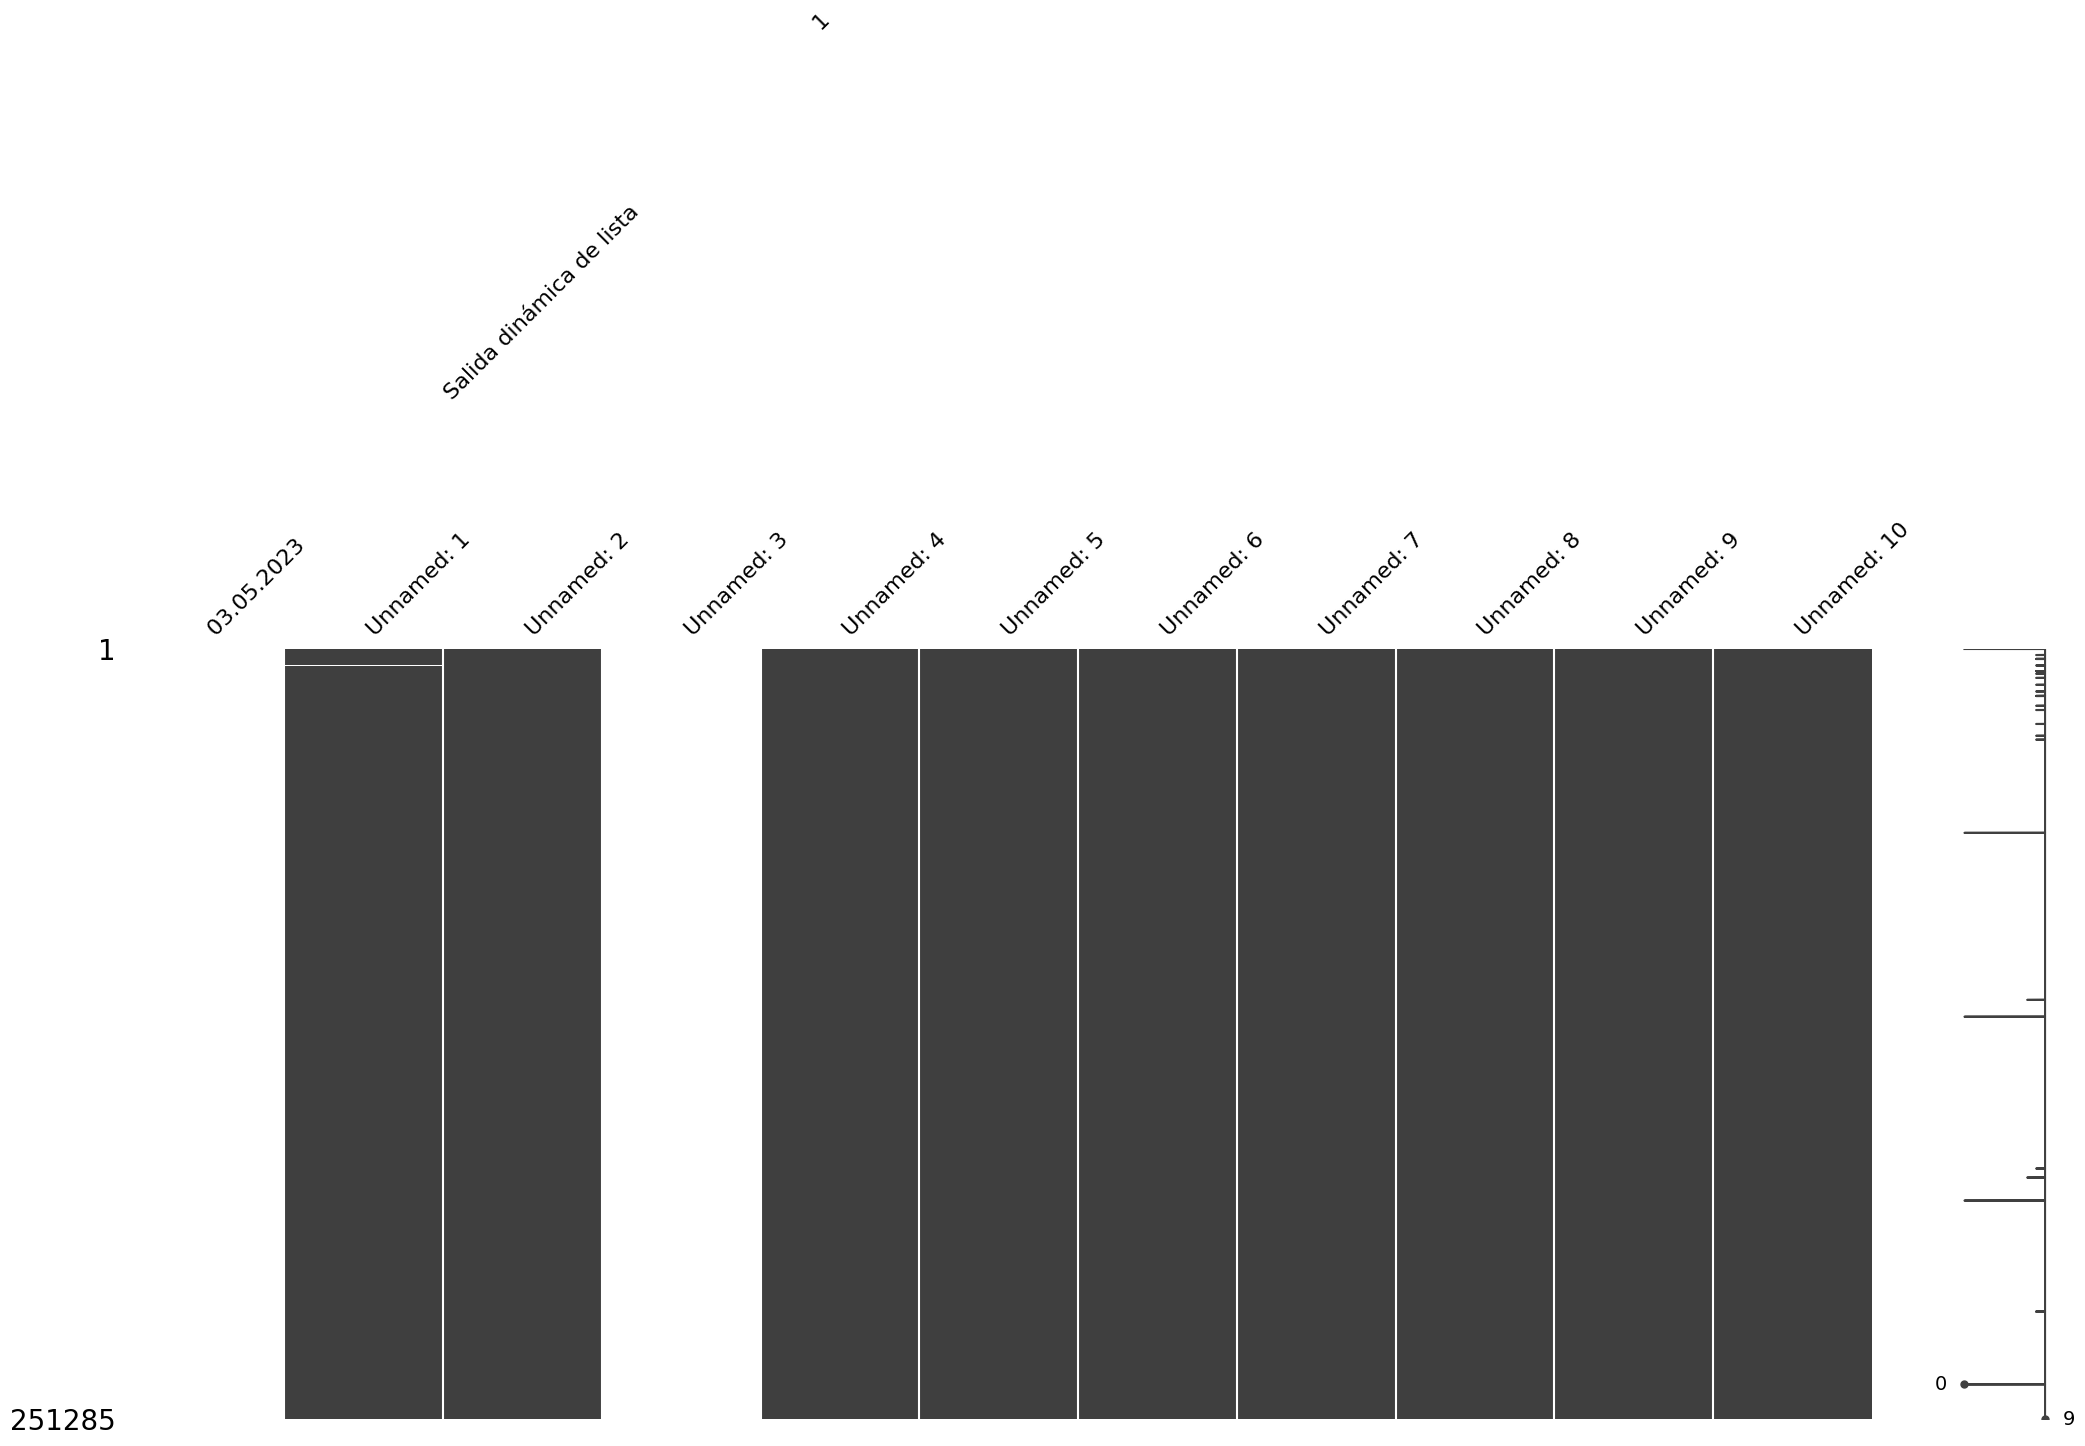

In [ ]:
#Revisamos visualmente la completitud del dataset.

msno.matrix(df);

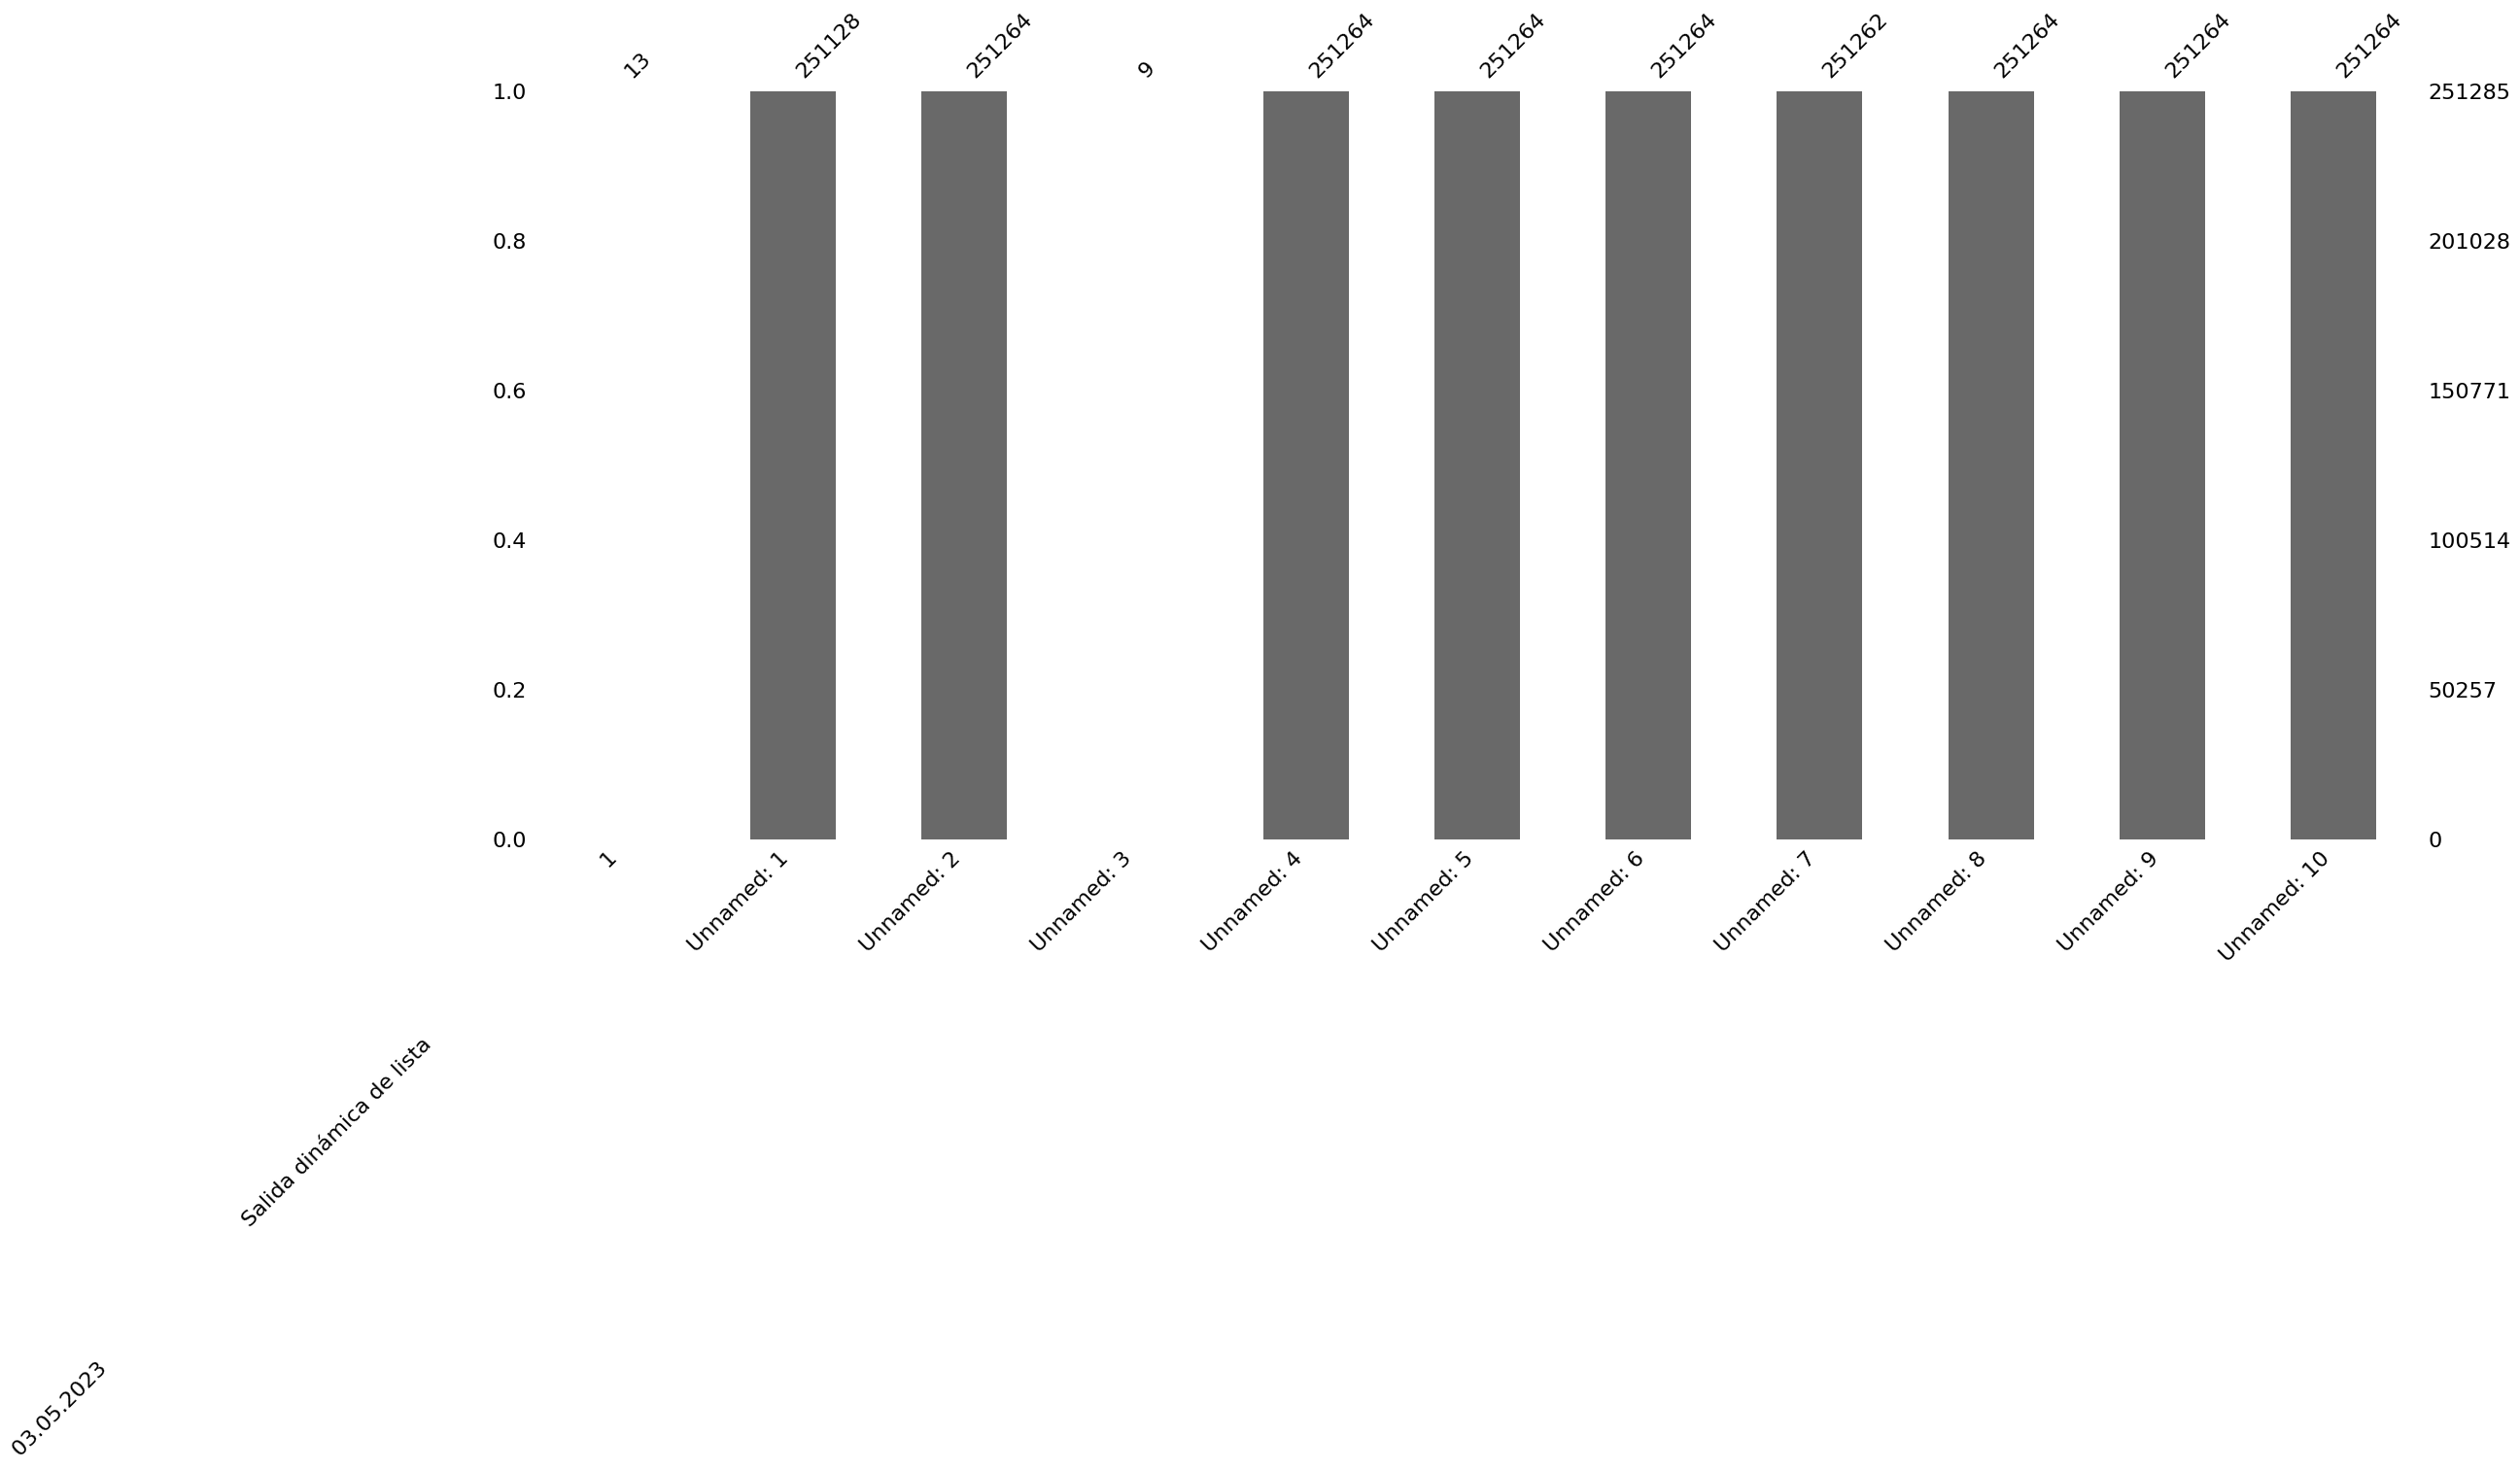

In [ ]:
#Verificamos cuales son las principales variables que tienen mayor valores faltantes.

msno.bar(df);

In [ ]:
#Cuantificamos la cantidad de datos faltantes que tenemos por variable:

df.isna().sum()

03.05.2023                             Salida dinámica de lista                                    1    251272
Unnamed: 1                                                                                                 157
Unnamed: 2                                                                                                  21
Unnamed: 3                                                                                              251276
Unnamed: 4                                                                                                  21
Unnamed: 5                                                                                                  21
Unnamed: 6                                                                                                  21
Unnamed: 7                                                                                                  23
Unnamed: 8                                                                                                  21
U

### **1.3. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?

  El conjunto de datos cuenta l conjunto de datos cuenta con etiquetas continuas.

- ¿El conjunto de datos cuenta con otras variables adicionales?, de ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.

  No cuenta con variables adicionales, sin embargo pretendemos incluir los precios de los productos para integrarlo cómo variable, ya que está correlacionado al comportamiento de la demanda.

### **1.4. Relación Entre Variables**
---

- Analice si existe alguna relación entre las variables. Puede utilizar medidas de correlación o visualizaciones.

  Los conjuntos son ampliamente separables.

- Identifique si hay redundancia entre las variables para una posterior eliminación o selección.

  Al ser un conjunto de imágenes no se hará proceso de selección de variables.

## **2. Limpieza de los Datos**
---

La selección de las técnicas de preprocesamiento puede variar en cada conjunto de datos. Recuerde que puede aplicar (no necesariamente todas) las técnicas generales vistas en el curso, dependiendo si está trabajando con imagenes, datos estructurados, textos, etc.

In [ ]:
df.head()

,03.05.2023 Salida dinámica de lista 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Artículo,NaN,NaN,1 15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sociedad,NaN,NaN,BP01 BPCL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sociedad CO,NaN,NaN,BP01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tipo de moneda,NaN,NaN,B0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Vamos a eliminar las columnas que no requerimos en el conjunto de datos, para lograr tener los datos estructurados, obtendremos el nombre de las columnas para realizar está operación.

nombres_columnas = df.columns.tolist()
print(", ".join(nombres_columnas))

03.05.2023                             Salida dinámica de lista                                    1, Unnamed: 1, Unnamed: 2, Unnamed: 3, Unnamed: 4, Unnamed: 5, Unnamed: 6, Unnamed: 7, Unnamed: 8, Unnamed: 9, Unnamed: 10


In [ ]:
# Eliminaremos las columnas que no necesitamos en el dataset

columnas_a_eliminar = ['03.05.2023                             Salida dinámica de lista                                    1', 'Unnamed: 3']
df.drop(columns=columnas_a_eliminar, inplace=True)

In [ ]:
# Ahora eliminaremos los valores faltantes

df.dropna(inplace=True)

In [ ]:
# Revisamos cómo va quedando el conjunto de datos

df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
12,Fe.factura,Grupo art.,Soc.,Artículo,Cliente,Ce.,VolVentas,Ingresos,COSTO A
14,04.01.2021,F1,BP01,2954,16518,BP01,2450,699.49,573.154
15,04.01.2021,F1,BP01,185,16518,BP01,675,530.954,446.591
16,04.01.2021,F1,BP01,2103,16518,BP01,560,709.687,630.561
17,04.01.2021,F1,BP01,2135,16518,BP01,250,254.916,216.096


In [ ]:
# Vamos a eliminar todas las columnas que estén vacías.

df.dropna(axis=1, how='all', inplace=True)

In [ ]:
# Ahora reiniciamos los índices.

df = df.reset_index(drop=True)

In [ ]:
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Fe.factura,Grupo art.,Soc.,Artículo,Cliente,Ce.,VolVentas,Ingresos,COSTO A
1,04.01.2021,F1,BP01,2954,16518,BP01,2450,699.49,573.154
2,04.01.2021,F1,BP01,185,16518,BP01,675,530.954,446.591
3,04.01.2021,F1,BP01,2103,16518,BP01,560,709.687,630.561
4,04.01.2021,F1,BP01,2135,16518,BP01,250,254.916,216.096


In [ ]:
# Ahora asignaremos cómo nombres de las columnas a la primera fila del dataframe, eliminamos la fila y reiniciamos índices.

df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)

In [ ]:
df.head()

,Fe.factura,Grupo art.,Soc.,Artículo,Cliente,Ce.,VolVentas,Ingresos,COSTO A
0,04.01.2021,F1,BP01,2954,16518,BP01,2450,699.49,573.154
1,04.01.2021,F1,BP01,185,16518,BP01,675,530.954,446.591
2,04.01.2021,F1,BP01,2103,16518,BP01,560,709.687,630.561
3,04.01.2021,F1,BP01,2135,16518,BP01,250,254.916,216.096
4,04.01.2021,F1,BP01,8302,16518,BP01,100,611.799,513.532


In [ ]:
# Revisaremos los nombres de las columnas para verificar que no tengan espacios

nombres_columnas = df.columns.tolist()
print(", ".join(nombres_columnas))

Fe.factura, Grupo art., Soc., Artículo, Cliente, Ce.,    VolVentas,            Ingresos,          COSTO A


In [ ]:
# Eliminaremos los espacios al inicio y al final de cada columna, dado que detectamos que esto podría arrojarnos errores en la limpieza de datos.

df.rename(columns=lambda x: x.strip(), inplace=True)

In [ ]:
# Convertiremos la columna Fe.factura en formato tipo fecha DD/MM/YYYY

df['Fe.factura'] = pd.to_datetime(df['Fe.factura'], format='%d.%m.%Y')

In [ ]:
# Ahora renombraremos la columna Fe.factura cómo Fecha y crearemos un nueva columna que nos arroje el Año y mes.

df.rename(columns={'Fe.factura': 'fecha'}, inplace=True)
df.rename(columns={'VolVentas': 'ventas'}, inplace=True)
df.rename(columns={'Artículo': 'articulo'}, inplace=True)
df['fecha'] = pd.to_datetime(df['fecha'])
df['Año'] = df['fecha'].dt.year
df['Mes'] = df['fecha'].dt.strftime('%B')
df['AñoMes'] = df['Año'].astype(str).str.cat(df['Mes'].astype(str), sep='-')

In [ ]:
df.head()

,fecha,Grupo art.,Soc.,articulo,Cliente,Ce.,ventas,Ingresos,COSTO A,Año,Mes,AñoMes
0,2021-01-04,F1,BP01,2954,16518,BP01,2450,699.49,573.154,2021,January,2021-January
1,2021-01-04,F1,BP01,185,16518,BP01,675,530.954,446.591,2021,January,2021-January
2,2021-01-04,F1,BP01,2103,16518,BP01,560,709.687,630.561,2021,January,2021-January
3,2021-01-04,F1,BP01,2135,16518,BP01,250,254.916,216.096,2021,January,2021-January
4,2021-01-04,F1,BP01,8302,16518,BP01,100,611.799,513.532,2021,January,2021-January


In [ ]:
# Ahora tomaremos las columnas que requerimos para nuestro proyecto y construiremos una tabla pivote.

df_Project = df.groupby(['fecha', 'articulo']).agg({'ventas': 'sum'}).reset_index()

In [ ]:
df_Project.head()

,fecha,articulo,ventas
0,2021-01-04,1,400
1,2021-01-04,10,150
2,2021-01-04,14,481.3
3,2021-01-04,84,500
4,2021-01-04,106,20


In [ ]:
# Vamos a eliminar los valores negativos de dataframe.

df_project = df_Project.drop(df_Project[df_Project['ventas'] < 0].index)

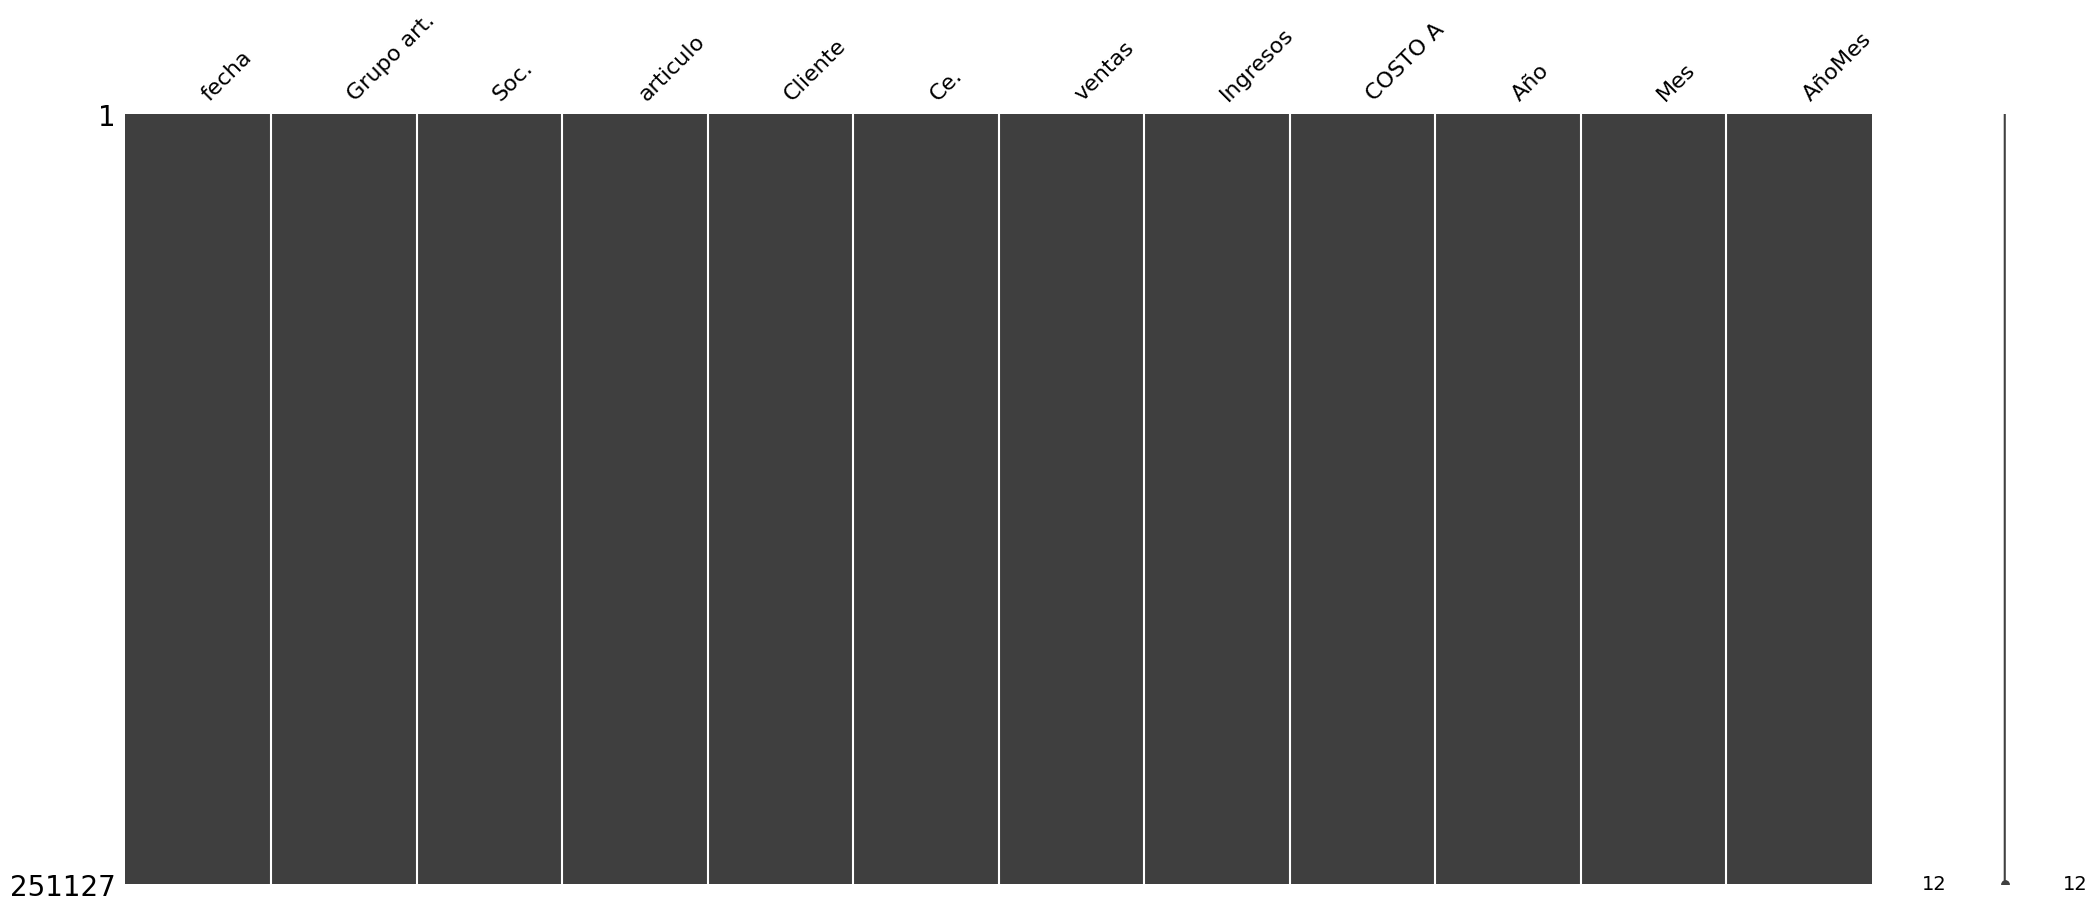

In [ ]:
# Revisamos visualmente la completitud del dataset después del preprocesamiento.

msno.matrix(df);

<Axes: xlabel='0'>

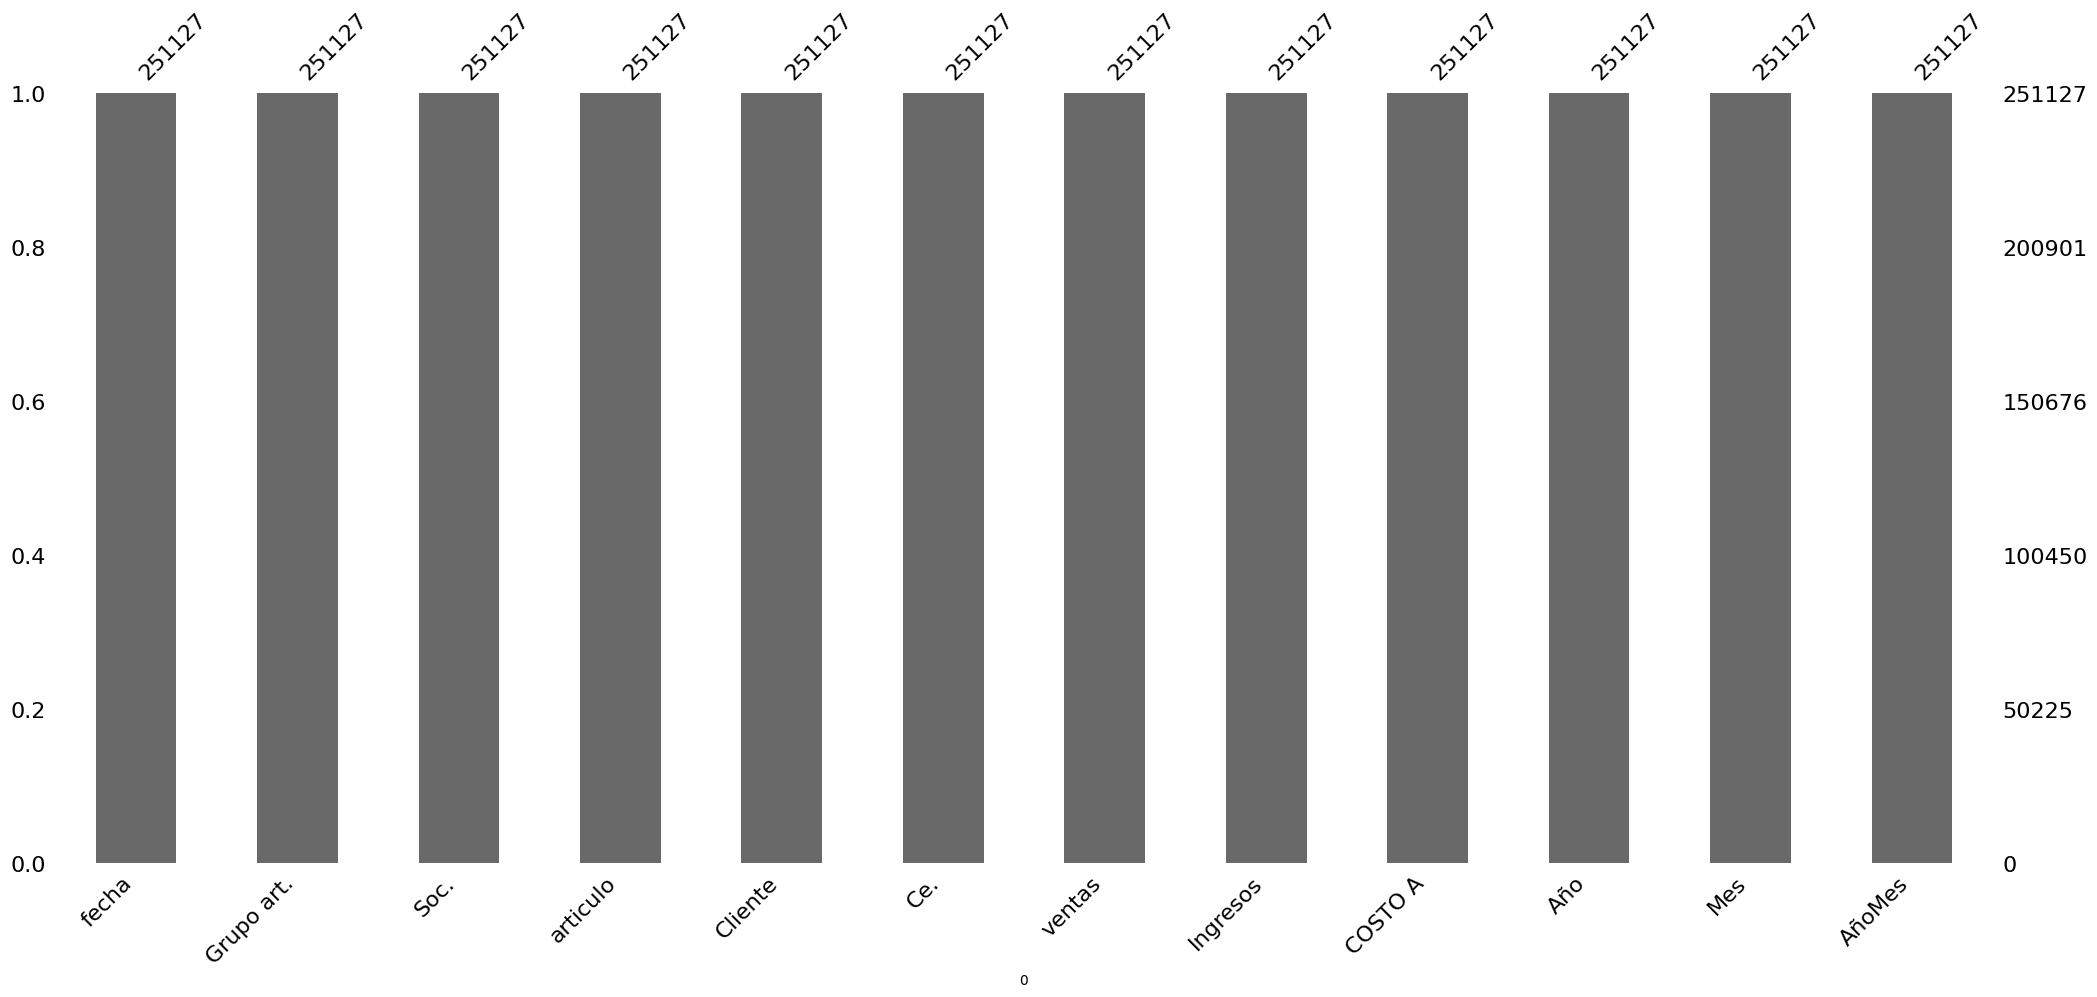

In [ ]:
# Verificamos que no tengamos faltantes.

msno.bar(df)

In [ ]:
# Ahora obtendremos una tabla pivote para dejar listos los datos para la implementación de nuestro modelo.

tabla_pivote = pd.pivot_table(df, values='ventas', index='articulo', columns=pd.Grouper(key='fecha', freq='M'), fill_value=0)
tabla_pivote.columns = [col.strftime('%B %Y') for col in tabla_pivote.columns]

In [ ]:
tabla_pivote.head()

,January 2021,February 2021,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,...,August 2022,September 2022,October 2022,November 2022,December 2022,January 2023,February 2023,March 2023,April 2023,May 2023
Artículo,,,,,,,,,,,,,,,,,,,,,
1,749.696970,1009.344262,1037.120000,952.877778,1003.869149,955.730556,1294.642857,1113.831776,896.766467,1239.000000,...,370.666667,755.933333,862.500000,952.500000,482.352941,904.833333,748.829787,609.027778,342.857143,780.0
2,340.000000,3642.857143,5872.727273,3502.000000,3113.684211,3060.000000,1894.615385,6324.000000,2572.000000,3366.000000,...,0.000000,680.000000,1813.333333,4080.000000,1360.000000,793.333333,340.000000,765.000000,340.000000,0.0
3,630.769231,817.105263,553.571429,1308.750000,476.785714,1277.777778,1016.129032,654.411765,505.833333,1211.666667,...,476.515152,550.000000,453.750000,459.782609,342.045455,616.666667,835.483871,947.727273,755.882353,-50.0
4,571.428571,151.562500,252.777778,330.555556,118.750000,327.083333,602.272727,253.769231,393.750000,615.625000,...,161.842105,128.428571,210.526316,235.000000,332.500000,100.000000,303.571429,314.583333,143.750000,75.0
5,0.000000,0.000000,63.500000,0.000000,0.000000,63.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
# Seleccionar solo filas del artículo 213

df_articulo = df_project.loc[df_project['articulo'] == 213]

# Seleccionar solo las columnas "fecha" y "ventas"

df_articulo_ventas = df_articulo[['fecha', 'ventas']].reset_index()

In [ ]:
df_articulo_ventas.head()

,index,fecha,ventas
0,8,2021-01-04,2500
1,119,2021-01-05,3000
2,467,2021-01-07,1400
3,914,2021-01-12,1025
4,1141,2021-01-13,3250


In [ ]:
serie_ventas = df_articulo_ventas.set_index('fecha')['ventas'].squeeze()
serie_ventas.head()

fecha
2021-01-04    2500
2021-01-05    3000
2021-01-07    1400
2021-01-12    1025
2021-01-13    3250
Name: ventas, dtype: object

In [ ]:
serie_ventas.describe()

count      423
unique     205
top       2000
freq        25
Name: ventas, dtype: int64

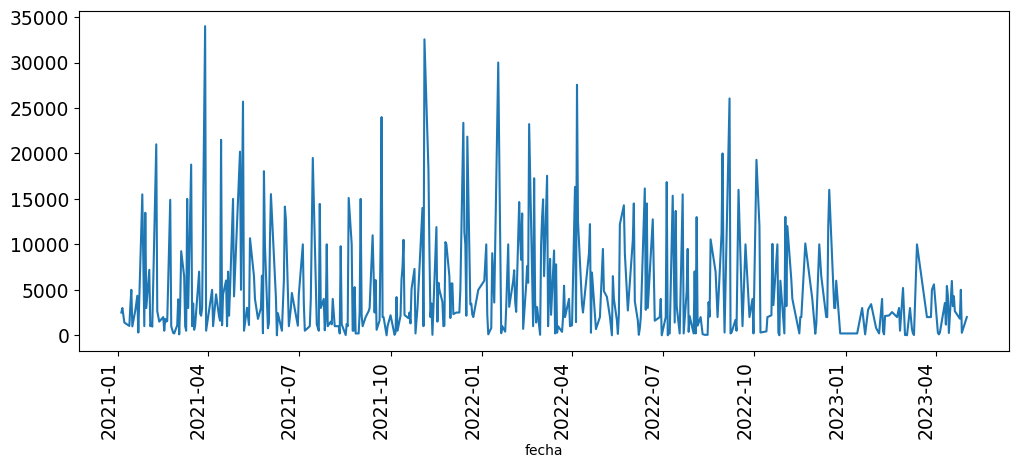

In [ ]:
serie_ventas.plot(rot=90, figsize = (12, 5), fontsize = 13.5);